# Modelagem

## Preparo dos dados para modelagem

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

In [252]:
data_dir = r"C:\Users\biapr\Desktop\SME0880"

### Leitura dos dados criados no arquivo 2

In [253]:
df = pd.read_csv('patient_correlations_with_classification.csv')
df.head(2)

,level_0,level_1,"('vmPFC', 'aPFC')","('vmPFC', 'aPFC').1","('vmPFC', 'mPFC')","('vmPFC', 'aPFC').2","('vmPFC', 'vmPFC')","('vmPFC', 'vmPFC').1","('vmPFC', 'aPFC').3","('vmPFC', 'vent aPFC')",...,"('post occipital', 'post occipital').19","('post occipital', 'post occipital').20","('post occipital', 'post occipital').21","('post occipital', 'post occipital').22","('post occipital', 'post occipital').23","('post occipital', 'post occipital').24","('post occipital', 'post occipital').25","('post occipital', 'post occipital').26","('post occipital', 'post occipital').27",diag
0,51461,0,0.175695,0.072106,0.081816,0.206274,0.102997,0.319958,0.161952,0.364796,...,0.335922,0.215270,0.087338,0.045692,0.052163,-0.220931,0.311907,0.164347,0.276658,1
1,51463,0,-0.368830,-0.119439,0.339539,-0.025849,0.308926,0.068077,-0.026906,-0.036931,...,-0.367171,-0.077061,-0.358534,-0.281108,0.051835,-0.300570,0.382619,0.472854,-0.066249,1


In [254]:
df.shape

(871, 12723)

In [255]:
linhas_nan = df.isna().any(axis=1).sum()
"{:.2f}%".format((linhas_nan/len(df))*100,"%")

'5.28%'

### Tratamentos iniciais

In [256]:
df_pacientes = df['level_0']
df_pacientes.head()

0    51461
1    51463
2    51464
3    51465
4    51473
Name: level_0, dtype: int64

In [257]:
df = df.drop(['level_0'],axis=1)
df = df.drop(['level_1'],axis=1)
df.head()

,"('vmPFC', 'aPFC')","('vmPFC', 'aPFC').1","('vmPFC', 'mPFC')","('vmPFC', 'aPFC').2","('vmPFC', 'vmPFC')","('vmPFC', 'vmPFC').1","('vmPFC', 'aPFC').3","('vmPFC', 'vent aPFC')","('vmPFC', 'vent aPFC').1","('vmPFC', 'vmPFC').2",...,"('post occipital', 'post occipital').19","('post occipital', 'post occipital').20","('post occipital', 'post occipital').21","('post occipital', 'post occipital').22","('post occipital', 'post occipital').23","('post occipital', 'post occipital').24","('post occipital', 'post occipital').25","('post occipital', 'post occipital').26","('post occipital', 'post occipital').27",diag
0,0.175695,0.072106,0.081816,0.206274,0.102997,0.319958,0.161952,0.364796,0.175969,-0.167000,...,0.335922,0.215270,0.087338,0.045692,0.052163,-0.220931,0.311907,0.164347,0.276658,1
1,-0.368830,-0.119439,0.339539,-0.025849,0.308926,0.068077,-0.026906,-0.036931,-0.197185,0.305320,...,-0.367171,-0.077061,-0.358534,-0.281108,0.051835,-0.300570,0.382619,0.472854,-0.066249,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.397052,0.657301,0.333119,0.306018,0.408782,0.191740,0.361156,0.372331,0.370931,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229935,0.421588,0.258974,0.409642,0.730639,0.417771,0.488363,-0.048931,0.272513,1
4,-0.119987,0.080547,0.006978,-0.287386,0.468913,0.087592,-0.009376,-0.149551,0.309103,0.473186,...,0.268082,0.085097,0.106637,0.439804,0.272471,0.154591,0.487218,0.285554,0.316727,1


In [258]:
df['diag'] = df['diag'].replace({1: 0, 2: 1})

In [259]:
df['diag']

0      0
1      0
2      0
3      0
4      0
      ..
866    0
867    0
868    0
869    0
870    0
Name: diag, Length: 871, dtype: int64

In [260]:
# Remocao de linhas duplicadas, caso existam
df = df.drop_duplicates()
df.shape

(871, 12721)

In [261]:
X = df.drop(columns=['diag'])
y = df['diag']

In [262]:
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: diag, dtype: int64

In [263]:
# Substituicao dos valores ausentes pela mediana
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_imputado = imputer.fit_transform(X)
X = pd.DataFrame(df_imputado, columns=X.columns)

In [264]:
X.head()

,"('vmPFC', 'aPFC')","('vmPFC', 'aPFC').1","('vmPFC', 'mPFC')","('vmPFC', 'aPFC').2","('vmPFC', 'vmPFC')","('vmPFC', 'vmPFC').1","('vmPFC', 'aPFC').3","('vmPFC', 'vent aPFC')","('vmPFC', 'vent aPFC').1","('vmPFC', 'vmPFC').2",...,"('post occipital', 'post occipital').18","('post occipital', 'post occipital').19","('post occipital', 'post occipital').20","('post occipital', 'post occipital').21","('post occipital', 'post occipital').22","('post occipital', 'post occipital').23","('post occipital', 'post occipital').24","('post occipital', 'post occipital').25","('post occipital', 'post occipital').26","('post occipital', 'post occipital').27"
0,0.175695,0.072106,0.081816,0.206274,0.102997,0.319958,0.161952,0.364796,0.175969,-0.167000,...,0.269976,0.335922,0.215270,0.087338,0.045692,0.052163,-0.220931,0.311907,0.164347,0.276658
1,-0.368830,-0.119439,0.339539,-0.025849,0.308926,0.068077,-0.026906,-0.036931,-0.197185,0.305320,...,0.526180,-0.367171,-0.077061,-0.358534,-0.281108,0.051835,-0.300570,0.382619,0.472854,-0.066249
2,0.073751,0.036094,0.224807,0.055795,0.277327,0.344667,-0.013900,0.015973,-0.027559,0.162245,...,0.309867,0.397052,0.657301,0.333119,0.306018,0.408782,0.191740,0.361156,0.372331,0.370931
3,0.073751,0.036094,0.224807,0.055795,0.277327,0.344667,-0.013900,0.015973,-0.027559,0.162245,...,0.327539,0.229935,0.421588,0.258974,0.409642,0.730639,0.417771,0.488363,-0.048931,0.272513
4,-0.119987,0.080547,0.006978,-0.287386,0.468913,0.087592,-0.009376,-0.149551,0.309103,0.473186,...,0.346862,0.268082,0.085097,0.106637,0.439804,0.272471,0.154591,0.487218,0.285554,0.316727


In [265]:
# Normalizacao dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaled, columns=X.columns)
X_norm.head()

,"('vmPFC', 'aPFC')","('vmPFC', 'aPFC').1","('vmPFC', 'mPFC')","('vmPFC', 'aPFC').2","('vmPFC', 'vmPFC')","('vmPFC', 'vmPFC').1","('vmPFC', 'aPFC').3","('vmPFC', 'vent aPFC')","('vmPFC', 'vent aPFC').1","('vmPFC', 'vmPFC').2",...,"('post occipital', 'post occipital').18","('post occipital', 'post occipital').19","('post occipital', 'post occipital').20","('post occipital', 'post occipital').21","('post occipital', 'post occipital').22","('post occipital', 'post occipital').23","('post occipital', 'post occipital').24","('post occipital', 'post occipital').25","('post occipital', 'post occipital').26","('post occipital', 'post occipital').27"
0,0.470575,0.149894,-0.643545,0.754705,-0.786495,-0.061230,0.787668,1.595409,0.943766,-1.658062,...,-0.654597,0.882215,-0.489538,-0.300337,-0.821291,-1.293883,-2.126504,0.331586,-0.781388,0.631360
1,-1.799519,-0.754264,0.519128,-0.345039,0.185751,-1.241045,-0.059000,-0.236849,-0.844390,0.735973,...,0.559859,-2.557647,-1.810078,-2.408090,-2.394683,-1.295400,-2.499467,0.648710,0.540986,-0.907424
2,0.045574,-0.020095,0.001534,0.041771,0.036565,0.054507,-0.000692,0.004444,-0.031542,0.010773,...,-0.465507,1.181291,1.507237,0.861535,0.432058,0.356775,-0.193894,0.552456,0.110106,1.054406
3,0.045574,-0.020095,0.001534,0.041771,0.036565,0.054507,-0.000692,0.004444,-0.031542,0.010773,...,-0.381737,0.363674,0.442457,0.511036,0.930958,1.846531,0.864646,1.122943,-1.695575,0.612758
4,-0.762108,0.189737,-0.981164,-1.584139,0.941097,-1.149634,0.019587,-0.750502,1.581746,1.586828,...,-0.290143,0.550312,-1.077564,-0.209103,1.076174,-0.274160,-0.367870,1.117807,-0.261850,0.811165


In [266]:
X_norm.shape

(871, 12720)

In [267]:
X.shape

(871, 12720)

## Aplicação dos modelos

In [270]:
# Validacao com k-folds estratificado
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

### Regressão Logística

Resultados para Regressão Logística:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       403
           1       0.65      0.69      0.67       468

    accuracy                           0.63       871
   macro avg       0.63      0.63      0.63       871
weighted avg       0.63      0.63      0.63       871



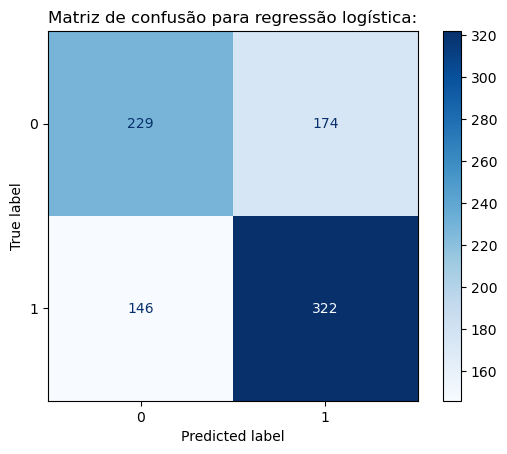

In [280]:
# Regressão logística com X
logistic_model = LogisticRegression(max_iter=1000)

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model.fit(X_train, y_train)
    y_pred_fold = logistic_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para Regressão Logística:")
lm = classification_report(y_real, y_pred)
print(lm)

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para regressão logística:')
plt.show()


Resultados para Regressão Logística com os dados normalizados
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       403
           1       0.66      0.69      0.67       468

    accuracy                           0.64       871
   macro avg       0.64      0.63      0.63       871
weighted avg       0.64      0.64      0.64       871



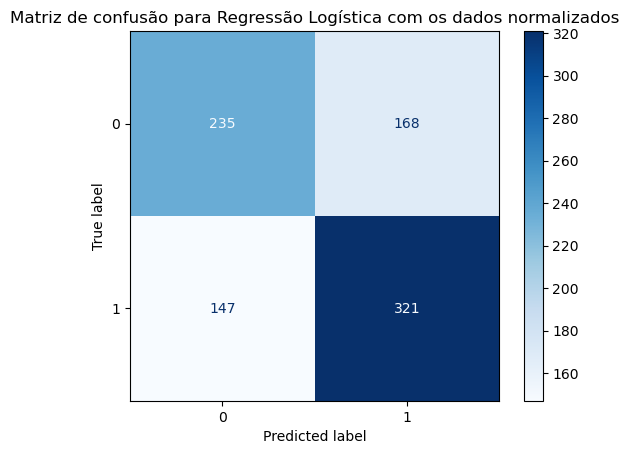

In [182]:
# Regressão logística com X normalizado
logistic_model_norm = LogisticRegression(max_iter=1000)

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X_norm, y):
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model.fit(X_train, y_train)
    y_pred_fold = logistic_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para Regressão Logística com os dados normalizados")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para Regressão Logística com os dados normalizados')
plt.show()


### XGBoost: XGBClassifier

Resultados para XGBoost
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       403
           1       0.62      0.69      0.65       468

    accuracy                           0.60       871
   macro avg       0.60      0.59      0.59       871
weighted avg       0.60      0.60      0.60       871



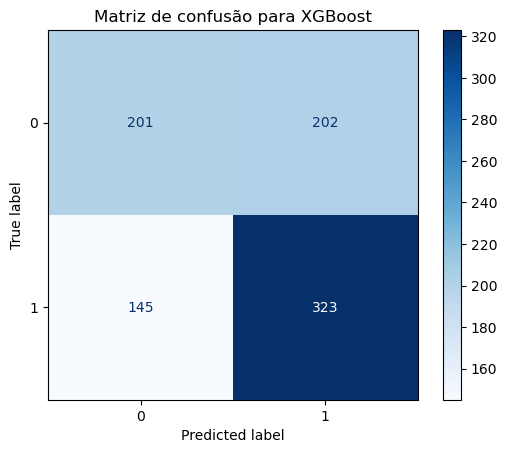

In [183]:
# XGBoost com X
xgb_model = XGBClassifier()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_pred_fold = xgb_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para XGBoost")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para XGBoost')
plt.show()

Resultados para XGBoost com dados normalizados
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       403
           1       0.62      0.69      0.65       468

    accuracy                           0.60       871
   macro avg       0.60      0.59      0.59       871
weighted avg       0.60      0.60      0.60       871



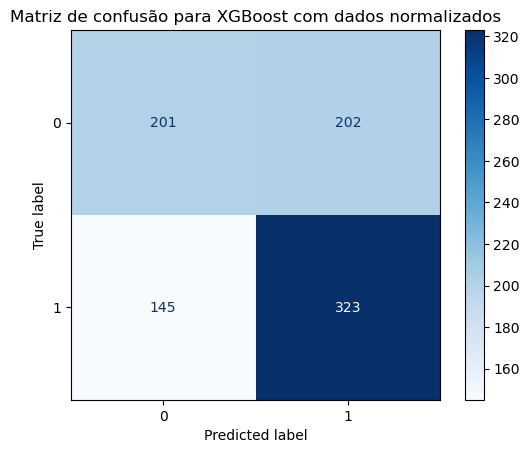

In [189]:
# XGBoost com X normalizado
xgb_model = XGBClassifier()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X_norm, y):
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_pred_fold = xgb_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para XGBoost com dados normalizados")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para XGBoost com dados normalizados')
plt.show()

### AdaBoost: AdaBoostClassifier

Resultados para AdaBoost
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       403
           1       0.57      0.58      0.58       468

    accuracy                           0.54       871
   macro avg       0.54      0.54      0.54       871
weighted avg       0.54      0.54      0.54       871



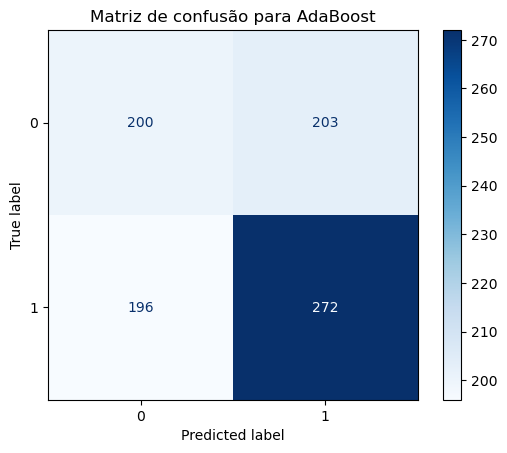

In [188]:
# AdaBoost com X
ada_model = AdaBoostClassifier()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ada_model.fit(X_train, y_train)
    y_pred_fold = ada_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para AdaBoost")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para AdaBoost')
plt.show()

Resultados para AdaBoost com dados normalizados
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       403
           1       0.57      0.58      0.58       468

    accuracy                           0.54       871
   macro avg       0.54      0.54      0.54       871
weighted avg       0.54      0.54      0.54       871



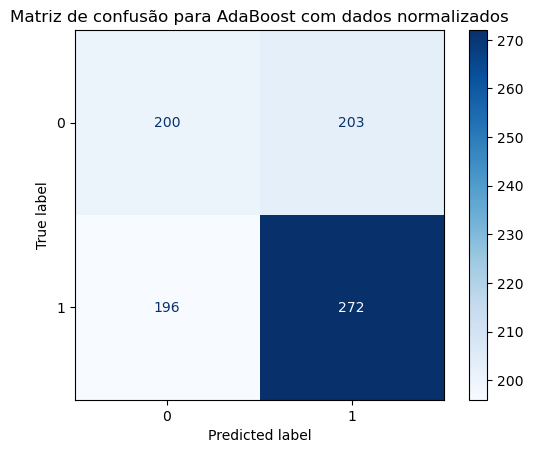

In [190]:
# AdaBoost com X
ada_model = AdaBoostClassifier()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X_norm, y):
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ada_model.fit(X_train, y_train)
    y_pred_fold = ada_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para AdaBoost com dados normalizados")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para AdaBoost com dados normalizados')
plt.show()

### Naive Bayes: GaussianNB

Resultados para Naive Bayes
              precision    recall  f1-score   support

           0       0.57      0.67      0.61       403
           1       0.66      0.56      0.61       468

    accuracy                           0.61       871
   macro avg       0.62      0.61      0.61       871
weighted avg       0.62      0.61      0.61       871



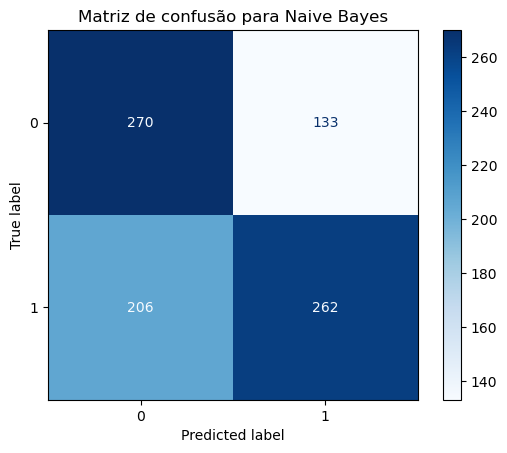

In [191]:
# Naive Bayes com X
nb_model = GaussianNB()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    nb_model.fit(X_train, y_train)
    y_pred_fold = nb_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para Naive Bayes")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para Naive Bayes')
plt.show()

### KNN: KNeighborsClassifier

Resultados para KNN
              precision    recall  f1-score   support

           0       0.54      0.45      0.49       403
           1       0.58      0.66      0.62       468

    accuracy                           0.56       871
   macro avg       0.56      0.56      0.56       871
weighted avg       0.56      0.56      0.56       871



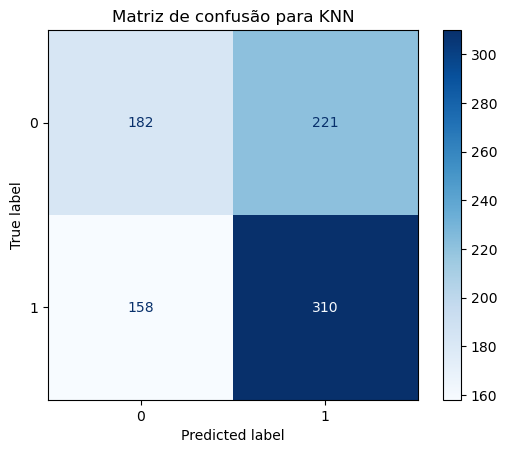

In [192]:
# KNN com X
knn_model = KNeighborsClassifier()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn_model.fit(X_train, y_train)
    y_pred_fold = knn_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para KNN")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para KNN')
plt.show()

### Multilayer Perceptron (MLP): MLPClassifier

Resultados para Multilayer Perceptron (MLP)
              precision    recall  f1-score   support

           0       0.62      0.55      0.59       403
           1       0.65      0.71      0.68       468

    accuracy                           0.64       871
   macro avg       0.64      0.63      0.63       871
weighted avg       0.64      0.64      0.64       871



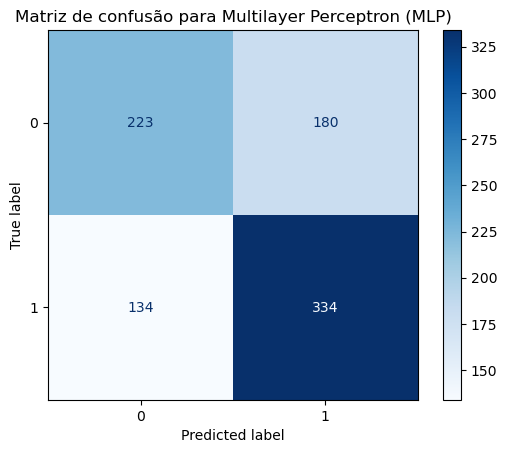

In [193]:
# Multilayer Perceptron (MLP) com X
mlp_model = MLPClassifier(max_iter=1000)

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    mlp_model.fit(X_train, y_train)
    y_pred_fold = mlp_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para Multilayer Perceptron (MLP)")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para Multilayer Perceptron (MLP)')
plt.show()

### Random Forest

Resultados para Random Forest
              precision    recall  f1-score   support

           0       0.58      0.43      0.49       403
           1       0.60      0.73      0.66       468

    accuracy                           0.59       871
   macro avg       0.59      0.58      0.58       871
weighted avg       0.59      0.59      0.58       871



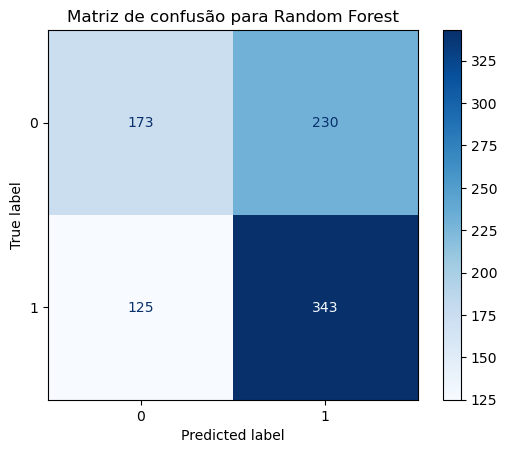

In [194]:
# Random Forest com X
rf_model = RandomForestClassifier()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    y_pred_fold = rf_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para Random Forest")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para Random Forest')
plt.show()

### SVM

Resultados para SVM
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       403
           1       0.65      0.75      0.70       468

    accuracy                           0.65       871
   macro avg       0.65      0.64      0.64       871
weighted avg       0.65      0.65      0.64       871



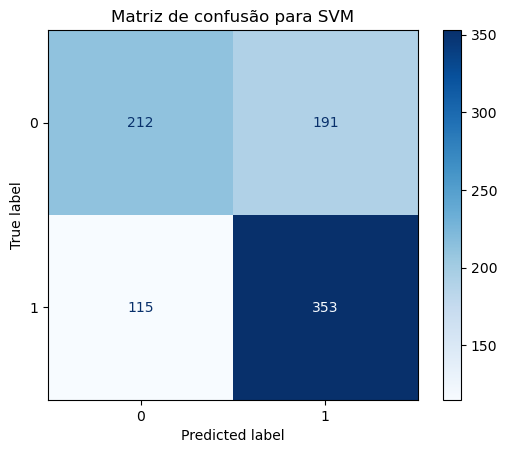

In [198]:
# SVM com X
svm_model = SVC()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm_model.fit(X_train, y_train)
    y_pred_fold = svm_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para SVM")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para SVM')
plt.show()

### Decision Tree

Resultados para Árvore de Decisão
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       403
           1       0.56      0.53      0.54       468

    accuracy                           0.52       871
   macro avg       0.52      0.52      0.52       871
weighted avg       0.53      0.52      0.52       871



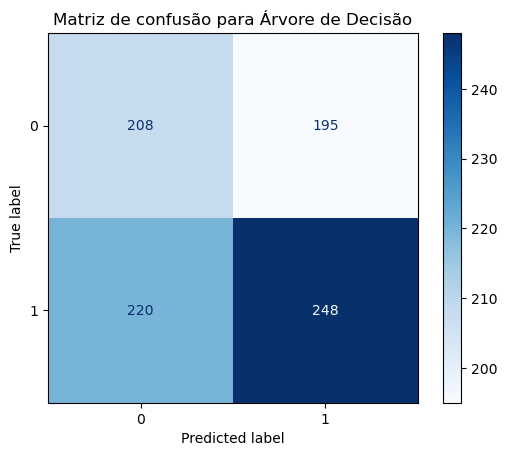

In [243]:
# SVM com X
dt_model = DecisionTreeClassifier()

y_real = []
y_pred = []

# Validacao cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dt_model.fit(X_train, y_train)
    y_pred_fold = dt_model.predict(X_test)
    
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Avaliacao do modelo
print("Resultados para Árvore de Decisão")
print(classification_report(y_real, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_real, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusão para Árvore de Decisão')
plt.show()

## Comparação dos modelos

In [312]:
metricas = {
    'Modelos' : ['Regressão Logística' , 'XGBoost' , 'AdaBoost', 'Naive Bayes', 'KNN', 'MPL', 'Random Forest', 'SVM', 'Decision Tree'],
    'Precision': [0.63, 0.60, 0.54, 0.62, 0.56, 0.64, 0.59, 0.65, 0.52],
    'Recall' : [0.63, 0.59, 0.54, 0.61, 0.56, 0.63, 0.58, 0.64, 0.52],
    'F1-Score' : [0.63, 0.59, 0.54, 0.61, 0.56, 0.63, 0.58, 0.64, 0.52],
    'Acuracia ' : [0.63, 0.60, 0.54, 0.61, 0.56, 0.64, 0.59, 0.65, 0.52],
    'Suport' : [871, 871, 871, 871, 871, 871, 871, 871, 871],
    'TP' : [229, 201, 200, 270, 182, 223, 173, 212, 208],
    'TN' : [322, 323, 272, 262, 310, 334, 343, 353, 248],
    'FP' : [146, 145, 196, 206, 158, 134, 125, 115, 220],
    'FN' : [174, 202, 203, 133, 221, 180, 230, 191, 195]
}

tabela = pd.DataFrame(metricas)

tabela.head(10)

,Modelos,Precision,Recall,F1-Score,Acuracia,Suport,TP,TN,FP,FN
0,Regressão Logística,0.63,0.63,0.63,0.63,871,229,322,146,174
1,XGBoost,0.60,0.59,0.59,0.60,871,201,323,145,202
2,AdaBoost,0.54,0.54,0.54,0.54,871,200,272,196,203
3,Naive Bayes,0.62,0.61,0.61,0.61,871,270,262,206,133
4,KNN,0.56,0.56,0.56,0.56,871,182,310,158,221
5,MPL,0.64,0.63,0.63,0.64,871,223,334,134,180
6,Random Forest,0.59,0.58,0.58,0.59,871,173,343,125,230
7,SVM,0.65,0.64,0.64,0.65,871,212,353,115,191
8,Decision Tree,0.52,0.52,0.52,0.52,871,208,248,220,195


In [319]:
dados_avaliacao = tabela[['Modelos', 'Precision', 'Recall', 'F1-Score', 'Acuracia ']]
dados_contagem = tabela[['Modelos', 'TP', 'TN', 'FP', 'FN']]

In [320]:
dados_avaliacao_melted = pd.melt(dados_avaliacao, id_vars='Modelos', var_name='Métrica', value_name='Valor')
dados_contagem_melted = pd.melt(dados_contagem, id_vars='Modelos', var_name='Métrica', value_name='Valor')

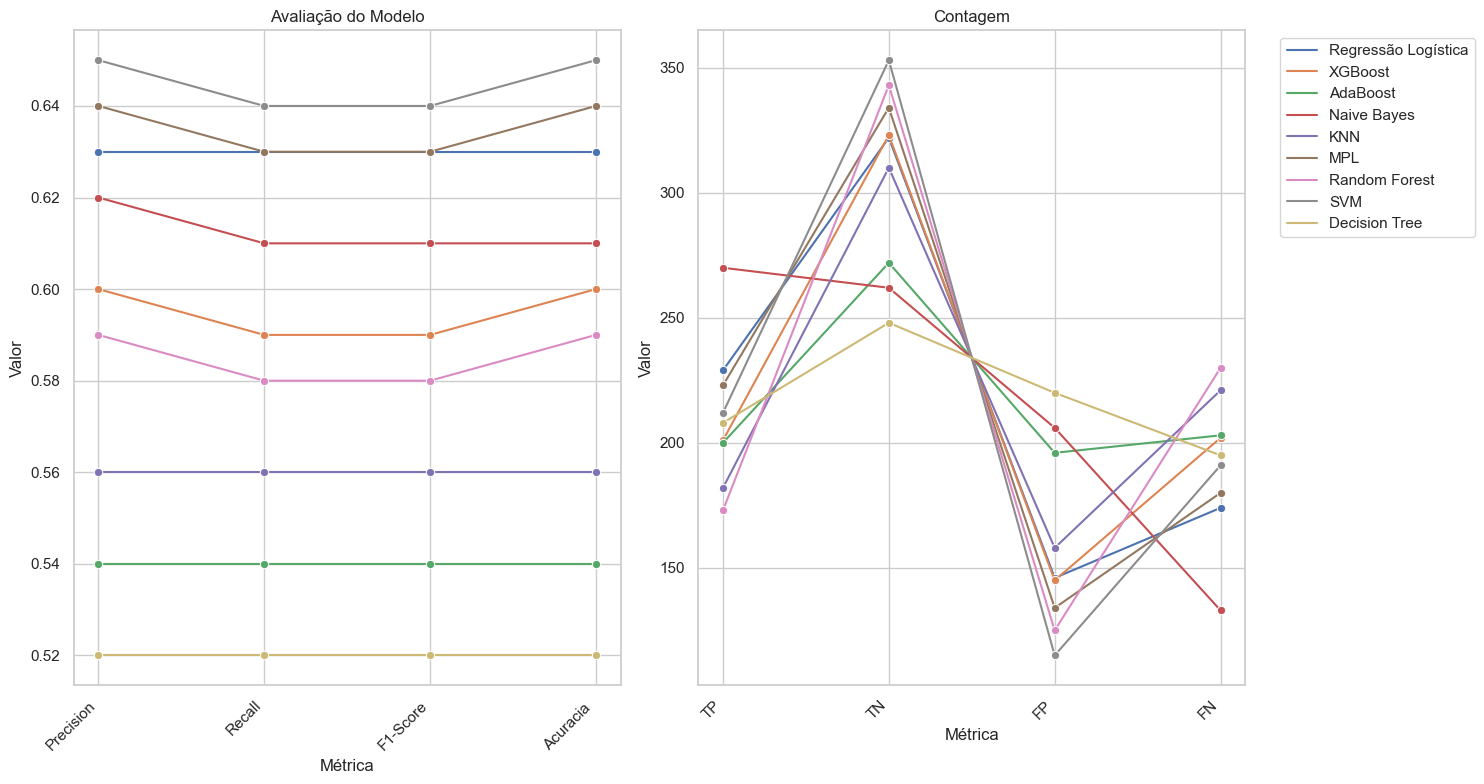

In [326]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.lineplot(data=dados_avaliacao_melted, x='Métrica', y='Valor', hue='Modelos', marker='o')
plt.title('Avaliação do Modelo')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.legend().remove() 


plt.subplot(1, 2, 2)
sns.lineplot(data=dados_contagem_melted, x='Métrica', y='Valor', hue='Modelos', marker='o')
plt.title('Contagem')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.legend().remove() 


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

O modelo que obteve as melhores métricas de avaliação foi o SVM, porém, nenhum deles obteve uma performance aceitável. 
Vale destacar que o Naive Bayes teve a menor quantidade de falso-negativo, o que pode ser interessante quando fala-se de dados de diagnóstico. 